In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from random import random
%matplotlib inline

In [2]:
#Volviendo a tomar una recta de la forma y = mx + b
m_i = 0.3
b_i =  0.1
N = 1000

In [3]:
data = 10*np.random.rand(N)

In [4]:
y = m_i*data+b_i
yerr = 0.1+0.5*np.random.rand(N)
#y += np.abs(f_i*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [5]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [6]:
plist = [0.0,5.0,0.0,5.0]

In [7]:
def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf

In [8]:
sigma_m = 0.1
sigma_b = 0.05

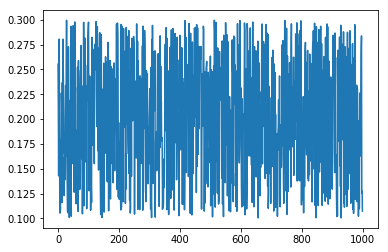

In [9]:
m_new = np.random.uniform(m_i,sigma_m,1000)
plt.plot(m_new)

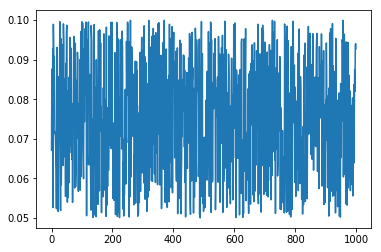

In [10]:
b_new = np.random.uniform(b_i,sigma_b,1000)
plt.plot(b_new)
plt.show()

In [11]:
def Pasos(theta_i,theta_p):
    if (lnprior(theta_p,theta_p)):
        return theta_i    
    p_i=lnlike(theta_i)
    p_p=lnlike(theta_p)
    p_n=p_p/p_i
    p_n=min(1.,p_n)
    if (p_n==1.):
        return theta_p
    else:
        x=random()
        if (p_n>=x):
            return theta_p
        else:
            return theta_i
    return

In [12]:
NS = 1000
Nc = 10
theta_in = [1.,0.0]
c = []

In [13]:
for i in range(N):
    theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
    for l in range(NS):
        if l==0:
            cadena = theta_i
        else:
            theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
            theta_n = Pasos(theta_i,theta_p)
            cadena = np.concatenate((cadena,theta_n))
            theta_i = theta_n
    if i==0:
        c = cadena
    else:
        c = np.vstack((c,cadena))

In [14]:
chain = c[:,:].reshape((-1, 2))
print len(chain)

1000000


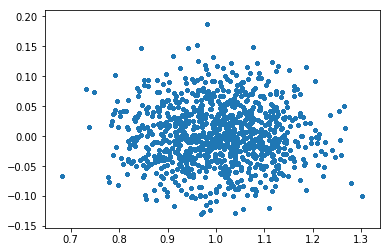

In [15]:
plt.scatter(chain[:,0],chain[:,1],s=None, marker='.')
plt.show()